In [2]:
import pandas as pd

In [3]:
train = pd.read_csv("Data/filled_train.csv")
test = pd.read_csv("Data/filled_test.csv")
extra = pd.read_csv("Data/filled_extra.csv")

In [4]:
train.head()

,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),id,Price
0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,0,112.15875
1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,1,68.88056
2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,2,39.17320
3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,3,80.60793
4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,4,86.02312


In [5]:
train.isna().sum()

Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
id                      0
Price                   0
dtype: int64

In [6]:
import seaborn as sns

In [7]:
def analyze_data(dataframe, cat_th=10, car_th=20):
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set. It also performs incomplete data analysis.
    Parameters
    ------
        dataframe: dataframe
            The dataframe from which variable names are to be retrieved
        cat_th: int, optional
            Class threshold value for numeric but categorical variables
        car_th: int, optional
            Class threshold for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
            Categorical variable list
        num_cols: list
            Numerik değişken listesi
        cat_but_car: list
            Categorical view cardinal variable list
    """
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]

    num_but_cat = [col for col in num_cols if dataframe[col].nunique() <= cat_th]
    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() >= car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    cat_cols = cat_cols + num_but_cat
    
    print(f"Number of Observations: {dataframe.shape[0]}")
    print(f"Number of Variables: {dataframe.shape[1]}")
    print(f'Cat cols: {len(cat_cols)}, Num cols: {len(num_cols)}, Cat but car cols: {len(cat_but_car)}')
    print("\nMissing Data")
    print(dataframe.isna().sum())

    return cat_cols, num_cols, cat_but_car

In [8]:
cat_cols, num_cols, cat_but_car = analyze_data(train)

Number of Observations: 300000
Number of Variables: 11
Cat cols: 8, Num cols: 3, Cat but car cols: 0

Missing Data
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
id                      0
Price                   0
dtype: int64


In [11]:
import matplotlib.pyplot as plt

C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\osman\AppData\Local\Temp\ipykernel_12988\1309923423.py:4: UserWarni

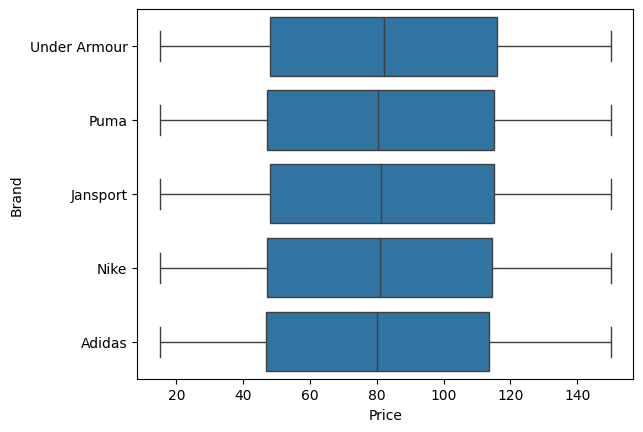

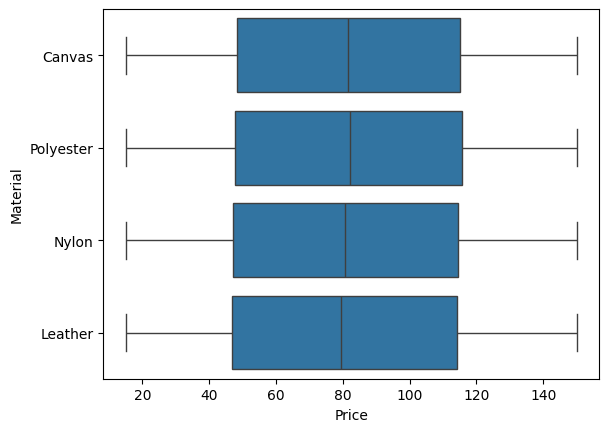

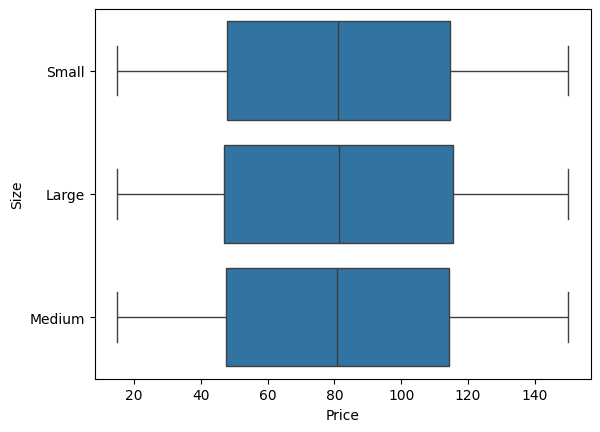

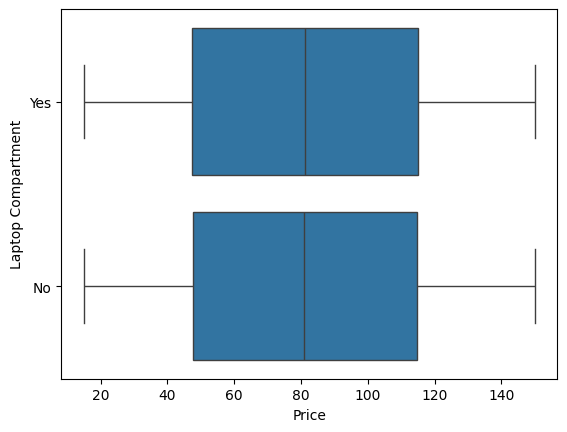

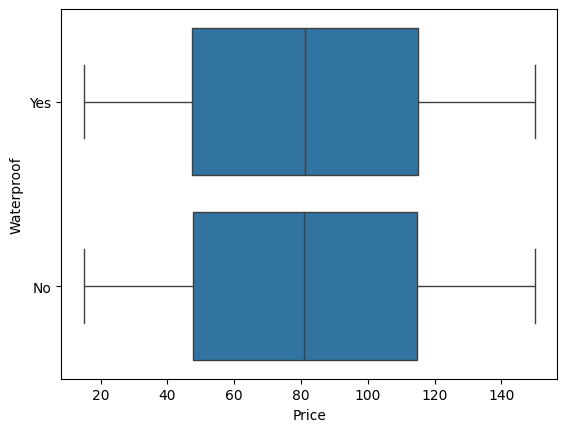

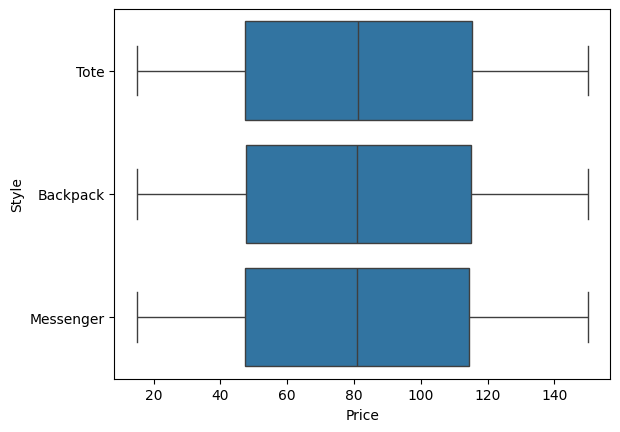

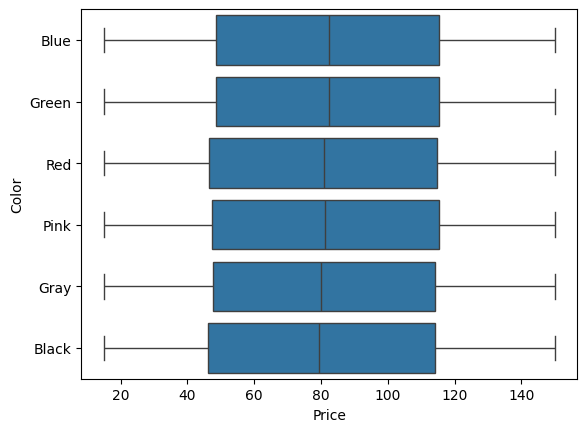

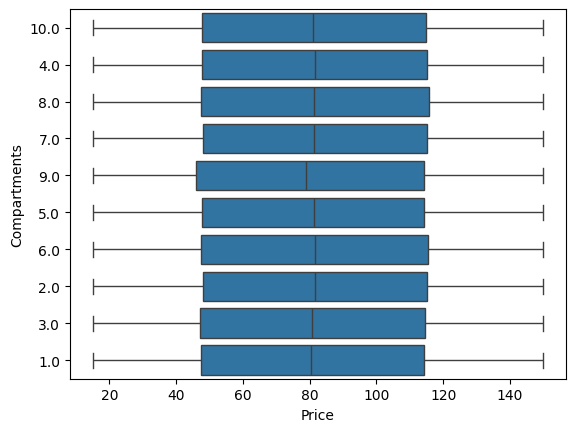

In [14]:
for col in cat_cols:
    fig = plt.figure()
    sns.boxplot(x=extra["Price"], y=extra[col].astype("str"))
    fig.show()

her hangi bir outlier değerim olmadığını görüyoruz